In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("cardekho_imputated 2.csv")

In [4]:
df = df.drop("Unnamed: 0",axis=1)
df = df.drop("car_name",axis=1)
df = df.drop("model", axis =1)

In [5]:
df['avg_car_price'] = (df['min_cost_price'] + df['max_cost_price'])/2
df.drop(columns= ['min_cost_price', 'max_cost_price'], inplace = True)

In [6]:
data = df
data = data[data['selling_price'] < 20000000]
data = data[data['km_driven'] < 1000000]
data = data[data['mileage'] < 100]
data = data[data['engine'] < 6100]
data = data[data['max_power'] < 530]
data = data.reset_index(drop=True)

In [7]:
data = pd.get_dummies(data=data, columns=['seller_type','fuel_type','transmission_type','brand'], drop_first=True)
data.shape

(15404, 43)

In [8]:
data.columns

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price', 'avg_car_price', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'fuel_type_Diesel',
       'fuel_type_Electric', 'fuel_type_LPG', 'fuel_type_Petrol',
       'transmission_type_Manual', 'brand_BMW', 'brand_Datsun', 'brand_Force',
       'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_ISUZU',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia',
       'brand_Land Rover', 'brand_Lexus', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Maserati', 'brand_Mercedes-AMG',
       'brand_Mercedes-Benz', 'brand_Mini', 'brand_Nissan', 'brand_Porsche',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

In [9]:
data.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,avg_car_price,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_Mercedes-Benz,brand_Mini,brand_Nissan,brand_Porsche,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,9,120000,19.70,796,46.30,5,120000,4.112027e+05,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,20000,18.90,1197,82.00,5,550000,7.295000e+05,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11,60000,17.00,1197,80.00,5,215000,1.081004e+06,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9,37000,20.92,998,67.10,5,226000,4.112027e+05,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,30000,22.77,1498,98.59,5,570000,1.196500e+06,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [11]:
X = data.drop(['selling_price'], axis=1)

In [12]:
y = data['selling_price']

In [13]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [14]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss= 'mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 170,369
Trainable params: 170,369
Non-trainable params: 0
_________________________________________________________________


In [15]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [17]:
# Load wights file of the best model :
wights_file = 'Weights-466--205533.18750.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [18]:
predictions = NN_model.predict(x_test)

97/97 [==============================] - 0s 1ms/step


In [19]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error

In [20]:
error = median_absolute_error(y_test, predictions)

In [21]:
error

107875.28125

In [22]:
r2_scr = r2_score(y_test, predictions)

In [23]:
r2_scr

0.7505434016556061

In [24]:
median_absolute_err = median_absolute_error(y_test, predictions)

In [25]:
median_absolute_err

107875.28125

#     

# pycart package

In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
df = pd.read_csv("cardekho_imputated 2.csv")

In [3]:
df = df.drop("Unnamed: 0",axis=1)
df = df.drop("car_name",axis=1)

In [4]:
df['avg_car_price'] = (df['min_cost_price'] + df['max_cost_price'])/2
df.drop(columns= ['min_cost_price', 'max_cost_price'], inplace = True)

In [5]:
data = df
data = data[data['selling_price'] < 20000000]
data = data[data['km_driven'] < 1000000]
data = data[data['mileage'] < 100]
data = data[data['engine'] < 6100]
data = data[data['max_power'] < 530]
data = data.reset_index(drop=True)

In [6]:
data.columns

Index(['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price', 'avg_car_price'],
      dtype='object')

In [7]:
cat_f = ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [8]:
exp_reg101 = setup(data = data, target = 'selling_price', categorical_features = cat_f,
                   ignore_features= [],
                   normalize = True,session_id = 123)

,Description,Value
0,Session id,123
1,Target,selling_price
2,Target type,Regression
3,Data shape,"(15404, 19)"
4,Train data shape,"(10782, 19)"
5,Test data shape,"(4622, 19)"
6,Ordinal features,1
7,Numeric features,7
8,Categorical features,5
9,Preprocess,True


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [10]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,102676.1708,41247002278.7694,199759.4139,0.9384,0.1890,0.1482,1.1820
lightgbm,Light Gradient Boosting Machine,102631.3553,41677521903.3442,201147.9439,0.9382,0.1972,0.1564,0.6200
et,Extra Trees Regressor,119481.9961,48286260581.9908,217140.4661,0.9278,0.2332,0.1905,1.6940
rf,Random Forest Regressor,140394.1988,58219601420.2134,239793.5621,0.9118,0.2701,0.2298,2.2390
xgboost,Extreme Gradient Boosting,143025.4314,59280192608.7830,241523.8046,0.9102,0.3133,0.2703,1.1550
knn,K Neighbors Regressor,115505.9261,76591466428.9274,269645.2025,0.8875,0.1993,0.1547,0.3860
dt,Decision Tree Regressor,168857.5296,102369322144.8947,316699.2860,0.8456,0.3072,0.2600,0.3500
ada,AdaBoost Regressor,283580.2043,136019433480.2932,368110.5174,0.7911,0.5842,0.6955,0.7280
br,Bayesian Ridge,195159.2794,163584974155.6649,399977.5924,0.7555,0.5758,0.3556,0.3220
lar,Least Angle Regression,195202.2707,163603808215.4903,399998.6733,0.7555,0.5838,0.3558,0.3080


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [11]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,110782.3485,79202096205.6265,281428.6698,0.9097,0.1903,0.1491
1,92445.4277,27125889466.4529,164699.3912,0.9601,0.1748,0.1375
2,110047.7883,51657499548.4663,227282.8624,0.9215,0.2015,0.1558
3,97176.2479,24571439782.3926,156752.7983,0.9627,0.1870,0.1499
4,94588.4092,26601340536.8017,163099.1739,0.9439,0.1884,0.1486
5,97580.7670,29181198617.0190,170825.0527,0.9458,0.1942,0.1528
6,105436.7971,51115521983.3476,226087.4211,0.9272,0.1810,0.1415
7,106437.9946,39254582305.0254,198127.6919,0.9374,0.1974,0.1529
8,109460.5729,41611647360.9843,203989.3315,0.9469,0.1886,0.1503


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,122085.0762,72351318336.3693,268982.0037,0.9175,0.2463,0.1951
1,115424.6226,39151787674.4315,197868.1068,0.9424,0.2544,0.2034
2,122941.0036,51673123160.5667,227317.2302,0.9215,0.2592,0.2104
3,128242.6802,61162130678.9099,247309.7869,0.9072,0.2414,0.2001
4,112122.1026,35277311127.9997,187822.5522,0.9256,0.2401,0.1970
5,114964.9584,46495052957.7812,215627.1155,0.9137,0.2396,0.1927
6,122134.4835,66696922730.8142,258257.4737,0.9050,0.2359,0.1871
7,116561.9033,42379130626.1192,205861.9213,0.9324,0.2460,0.1967
8,131187.4517,59820142997.0300,244581.5672,0.9237,0.2395,0.1953


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
print(gbr)

GradientBoostingRegressor(random_state=123)


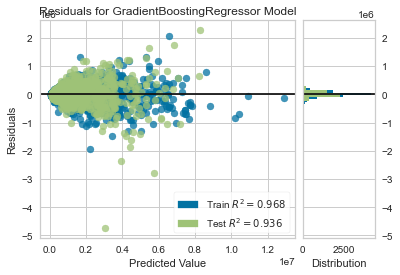

In [20]:
plot_model(gbr)

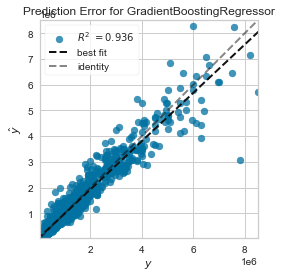

In [21]:
plot_model(gbr, plot = 'error')

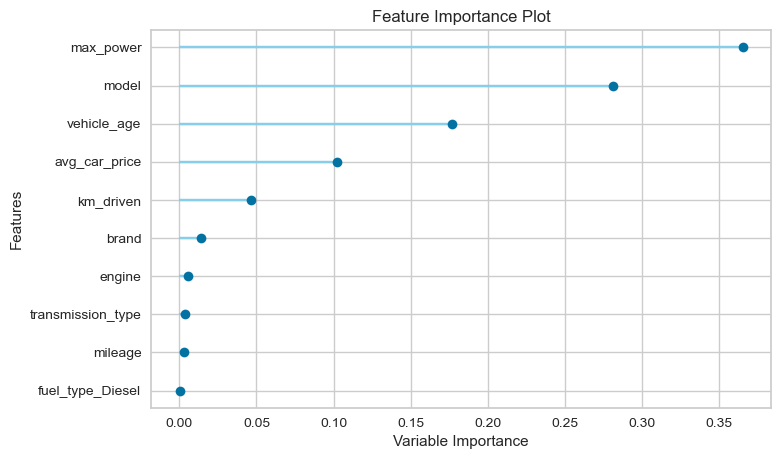

In [22]:
plot_model(gbr, plot = 'feature')

In [23]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,102246.6075,39809165485.2502,199522.3433,0.9365,0.1882,0.1465


,brand,model,vehicle_age,km_driven,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Petrol,fuel_type_Diesel,fuel_type_LPG,fuel_type_CNG,fuel_type_Electric,transmission_type,mileage,engine,max_power,seats,avg_car_price,selling_price,Label
10782,-0.328929,-0.425552,-1.007209,-0.795877,-1.275113,1.306264,-0.10698,1.005021,-0.960705,-0.053698,-0.140253,-0.019265,0.510500,-0.185347,-0.563073,-0.444828,-0.406702,-0.111063,600000,5.071090e+05
10783,-0.470275,-0.351955,0.317633,1.387439,-1.275113,1.306264,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,0.897906,-0.463806,-0.634085,-0.406702,-0.106672,390000,4.750076e+05
10784,-0.250334,-0.203091,0.317633,1.132973,-1.275113,1.306264,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,1.523786,0.022796,-0.041754,-0.406702,-0.077064,550000,5.427350e+05
10785,-0.328929,-0.425552,0.317633,-0.012123,0.784244,-0.765542,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,1.042340,-0.584483,-0.634808,-0.406702,-0.111063,375000,4.162545e+05
10786,1.011223,0.578770,-0.344788,3.321379,0.784244,-0.765542,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,-1.958864,-2.000399,2.469431,1.713570,2.036227,-0.048988,1350000,1.730685e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15399,-0.539225,-0.289407,0.317633,-0.228419,-1.275113,1.306264,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,0.187773,-0.049221,-0.398116,-0.406702,-0.086297,460000,5.184735e+05
15400,-0.470275,0.097439,-0.675999,0.573149,-1.275113,1.306264,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,1.114557,-0.463806,-0.284947,-0.406702,-0.098000,725000,8.201330e+05
15401,-0.470275,-0.351955,-0.344788,-0.521054,0.784244,-0.765542,-0.10698,1.005021,-0.960705,-0.053698,-0.140253,-0.019265,0.510500,0.560894,-0.563073,-0.446273,-0.406702,-0.106672,550000,5.369327e+05
15402,-0.250334,-0.203091,0.980054,0.369576,-1.275113,1.306264,-0.10698,1.005021,-0.960705,-0.053698,-0.140253,-0.019265,0.510500,-0.690866,0.020850,0.384436,-0.406702,-0.080466,625000,4.099982e+05


In [25]:
final_gbr = finalize_model(gbr)
print(final_gbr)

Pipeline(memory=Memory(location=C:\Users\Raghuram\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['vehicle_age', 'km_driven',
                                             'mileage', 'engine', 'max_power',
                                             'seats', 'avg_car_price'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['brand', 'model', 'seller_type',
                                             'fuel_type', 'transmissio...
                 TransformerWrapper(include=['brand', 'model'],
                                    transformer=LeaveOneOutEncoder(cols=['brand',
                                                                         'model'],
                                                                   handle_missing='return_nan',
                                                                   random_st

In [26]:
predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,100965.2590,39014724787.0171,197521.4540,0.9377,0.1892,0.1462


,brand,model,vehicle_age,km_driven,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Petrol,fuel_type_Diesel,fuel_type_LPG,fuel_type_CNG,fuel_type_Electric,transmission_type,mileage,engine,max_power,seats,avg_car_price,selling_price,Label
10782,-0.328929,-0.425552,-1.007209,-0.795877,-1.275113,1.306264,-0.10698,1.005021,-0.960705,-0.053698,-0.140253,-0.019265,0.510500,-0.185347,-0.563073,-0.444828,-0.406702,-0.111063,600000,5.161196e+05
10783,-0.470275,-0.351955,0.317633,1.387439,-1.275113,1.306264,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,0.897906,-0.463806,-0.634085,-0.406702,-0.106672,390000,4.647817e+05
10784,-0.250334,-0.203091,0.317633,1.132973,-1.275113,1.306264,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,1.523786,0.022796,-0.041754,-0.406702,-0.077064,550000,5.495937e+05
10785,-0.328929,-0.425552,0.317633,-0.012123,0.784244,-0.765542,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,1.042340,-0.584483,-0.634808,-0.406702,-0.111063,375000,4.051723e+05
10786,1.011223,0.578770,-0.344788,3.321379,0.784244,-0.765542,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,-1.958864,-2.000399,2.469431,1.713570,2.036227,-0.048988,1350000,1.806381e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15399,-0.539225,-0.289407,0.317633,-0.228419,-1.275113,1.306264,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,0.187773,-0.049221,-0.398116,-0.406702,-0.086297,460000,5.455235e+05
15400,-0.470275,0.097439,-0.675999,0.573149,-1.275113,1.306264,-0.10698,-0.995004,1.040903,-0.053698,-0.140253,-0.019265,0.510500,1.114557,-0.463806,-0.284947,-0.406702,-0.098000,725000,7.724844e+05
15401,-0.470275,-0.351955,-0.344788,-0.521054,0.784244,-0.765542,-0.10698,1.005021,-0.960705,-0.053698,-0.140253,-0.019265,0.510500,0.560894,-0.563073,-0.446273,-0.406702,-0.106672,550000,5.325738e+05
15402,-0.250334,-0.203091,0.980054,0.369576,-1.275113,1.306264,-0.10698,1.005021,-0.960705,-0.053698,-0.140253,-0.019265,0.510500,-0.690866,0.020850,0.384436,-0.406702,-0.080466,625000,4.334910e+05


In [50]:
#unseen_predictions = predict_model(final_gbr, data=test)
#unseen_predictions.head()

In [28]:
save_model(final_gbr,'Final GBR Model 04Sep2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\Raghuram\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['vehicle_age', 'km_driven',
                                              'mileage', 'engine', 'max_power',
                                              'seats', 'avg_car_price'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['brand', 'model', 'seller_type',
                                              'fuel_type', 'transmissio...
                  TransformerWrapper(include=['brand', 'model'],
                                     transformer=LeaveOneOutEncoder(cols=['brand',
                                                                          'model'],
                                                                    handle_missing='return_nan',
                                                               